<a href="https://colab.research.google.com/github/Jacer7/CNN/blob/main/Audio_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
import tensorflow as tf

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
   df = pd.read_csv('/content/drive/MyDrive/Hiring Challenge - Data Scientist Audio Internship/part3_GrooverChallengeDataset.csv')
   df.head(2)


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-0.000045,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.67230,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,0.000140,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.23176,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues


# Deep Learning

In [133]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [134]:
df['label'] = le.fit_transform(df['label'])

In [135]:
df.head(5)

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,0
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,0
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,0
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,0
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,0


In [136]:
le.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [137]:
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [139]:
# Convert DataFrame into Array
X_frame = df.drop(['label'], axis=1)
X_data = X_frame.to_numpy().astype(float)
X_data.shape

(1000, 58)

In [141]:
# Standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_data)
X_data = scaler.transform(X_data)

In [150]:
y_data = df['label']

In [151]:
# Since the target data is multi class of 10, we we one-hot-encoding and create an array of 10 columns
y_data = tf.keras.utils.to_categorical(y_data, 10)

In [152]:
print("\nfeatures after scaling:\n----------------")
print(X_data[:1,:])
print("\nTarget after one-hot-encoding:\n----------------")
print(y_data[:5,:])


features after scaling:
----------------
[[-0.13282213 -0.35013678  0.31258717 -0.01068969 -0.06185589 -0.5835852
  -0.84831131 -0.45640248 -0.53104201 -0.48647252 -0.66193361 -0.49204509
  -0.73434937  0.19050282 -0.37499162  0.37275672  0.00432643  0.12536307
   0.30847037 -0.42744458  0.70309345 -0.93639809 -0.47269061 -0.81084363
   0.36466458 -0.59684161 -0.42732103 -0.06423578  0.33717421 -0.55597237
  -0.86315362 -0.8344325   0.49951802 -0.46959533 -0.63770406 -0.16118663
   0.40925862 -0.49971511 -0.33836791 -0.36147796  0.64538476 -0.53441001
   0.18219014 -0.80434978  0.79228723 -0.70309227 -0.26555766 -0.38652827
  -0.08639575 -0.24611385  0.50046241 -0.78026476 -0.23704039 -0.64317667
   0.00672291 -0.30059734  0.60406407 -0.51298758]]

Target after one-hot-encoding:
----------------
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [153]:
# split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.20)

In [154]:
print("\nTrain Test Dimension:\n-----------")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Train Test Dimension:
-----------
(800, 58) (800, 10) (200, 58) (200, 10)


In [155]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2


In [178]:
# Setup hyper parameters for deep learning
EPOCHS = 15
BATCH_SIZE = 16
VERBOSE = 1
NB_CLASSES = 10
# N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [179]:
# Create a keras model
model = tf.keras.models.Sequential()

# Add first hidden dense layer
model.add(keras.layers.Dense(128,
                             input_shape=(58,),
                             name='Dense-layer-1',
                             activation = 'relu'))

In [180]:
# Add second hidden layer
model.add(keras.layers.Dense(128,
                             name='Dense-layer-2',
                             activation = 'relu'))

In [182]:
# Add final layer with softmax
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Final-layer',
                             activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-layer-1 (Dense)       (None, 128)               7552      
                                                                 
 Dense-layer-2 (Dense)       (None, 128)               16512     
                                                                 
 Final-layer (Dense)         (None, 10)                1290      
                                                                 
Total params: 25,354
Trainable params: 25,354
Non-trainable params: 0
_________________________________________________________________


In [183]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
# Fit parameters
print("\nTraining Progress:\n------------------------")
history = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)



Training Progress:
------------------------
Epoch 1/15
40/40 [==============================] - 1s 7ms/step - loss: 1.7831 - accuracy: 0.3859 - val_loss: 1.5277 - val_accuracy: 0.4375
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 1.1654 - accuracy: 0.6156 - val_loss: 1.2426 - val_accuracy: 0.5562
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 0.9024 - accuracy: 0.7063 - val_loss: 1.0772 - val_accuracy: 0.6313
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 0.7250 - accuracy: 0.7891 - val_loss: 0.9695 - val_accuracy: 0.7063
Epoch 5/15
40/40 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.8188 - val_loss: 0.9264 - val_accuracy: 0.6875
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.8453 - val_loss: 0.8654 - val_accuracy: 0.7250
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8813 - val_loss: 0.902


Accuracy during Training :
-------------------


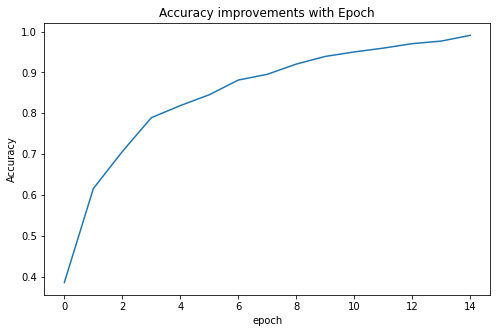


Evaluation against Test Dataset:
----------------
7/7 [==============================] - 0s 4ms/step - loss: 1.0528 - accuracy: 0.7050


[1.0528342723846436, 0.7049999833106995]

In [185]:
print("\nAccuracy during Training :\n-------------------")
import matplotlib.pyplot as plt
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy improvements with Epoch")
plt.show()

# Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset:\n----------------")
model.evaluate(X_test, y_test)
